# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте файлы [на странице задания] и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [78]:
import pandas as pd
import os
import numpy as np

import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 8)

import warnings
warnings.filterwarnings('ignore')

PATH_TO_DATA = 'data'

In [2]:
df_train = pd.read_csv(os.path.join(PATH_TO_DATA, 'orange_small_churn_data.train'))
df_train

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,NaN,NaN,NaN,NaN,NaN,938.0,7.0,NaN,NaN,NaN,...,oslk,8xSqDjb,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN
39996,NaN,NaN,NaN,NaN,NaN,1750.0,7.0,NaN,NaN,NaN,...,oslk,WUmqPCU,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN
39997,NaN,NaN,NaN,NaN,NaN,1204.0,7.0,NaN,NaN,NaN,...,oslk,pHOw_BK,LM8l689qOp,NaN,ELof,WqMG,RAYp,F2FyR07IdsN7I,am7c,NaN
39998,NaN,NaN,NaN,NaN,NaN,8232.0,14.0,NaN,NaN,NaN,...,oslk,WC7Esaq,LM8l689qOp,NaN,NaN,wX53,RAYp,F2FyR07IdsN7I,NaN,NaN


In [3]:
labels_train = pd.read_csv(os.path.join(PATH_TO_DATA, 'orange_small_churn_labels.train'), header=None, squeeze=True)
labels_train

0       -1
1       -1
2       -1
3        1
4       -1
        ..
39995   -1
39996   -1
39997   -1
39998   -1
39999   -1
Name: 0, Length: 40000, dtype: int64

2\. Рассчитайте доли классов `отток` и `не отток`.

Абсолютные значения:

In [4]:
labels_train.value_counts()

-1    37024
 1     2976
Name: 0, dtype: int64

Доли:

In [5]:
labels_train.value_counts(normalize=True)

-1    0.9256
 1    0.0744
Name: 0, dtype: float64

- отток: 7,4%
- не отток: 92,6%

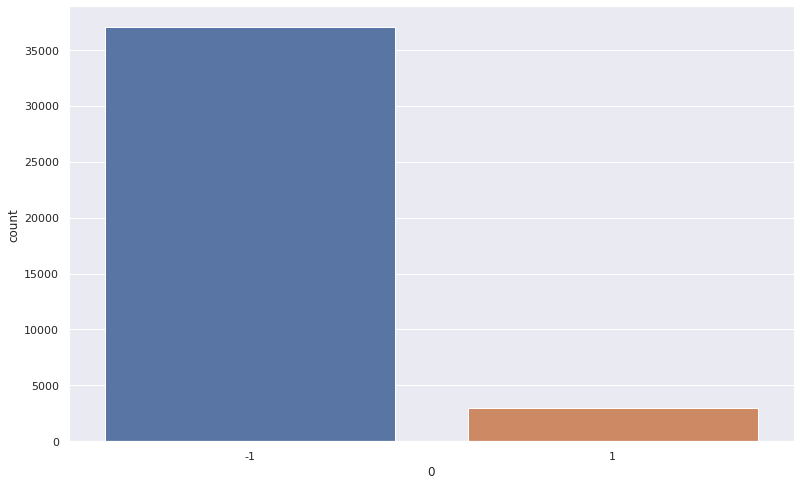

In [6]:
sns.countplot(x=labels_train);

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://stepik.org/lesson/90035/step/3?unit=66281 

Удалим полностью NaN колонки

In [7]:
df_train.dropna(axis=1, how='all', inplace=True)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 212 entries, Var1 to Var229
dtypes: float64(173), int64(1), object(38)
memory usage: 64.7+ MB


In [9]:
not_nans = df_train.describe().loc['count'].sort_values()

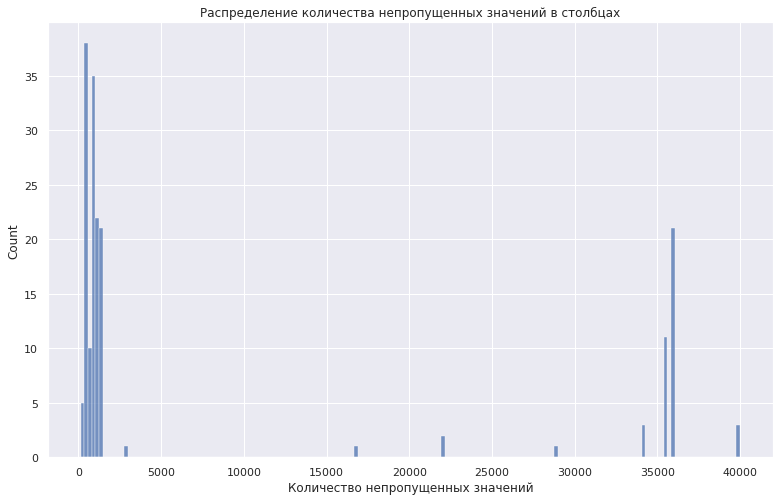

In [64]:
sns.histplot(not_nans);
plt.title('Распределение количества непропущенных значений в столбцах')
plt.xlabel('Количество непропущенных значений');

Построим boxplot'ы для 10 столбцов с максимальным количеством NaN'ов

In [11]:
df_train['target'] = labels_train

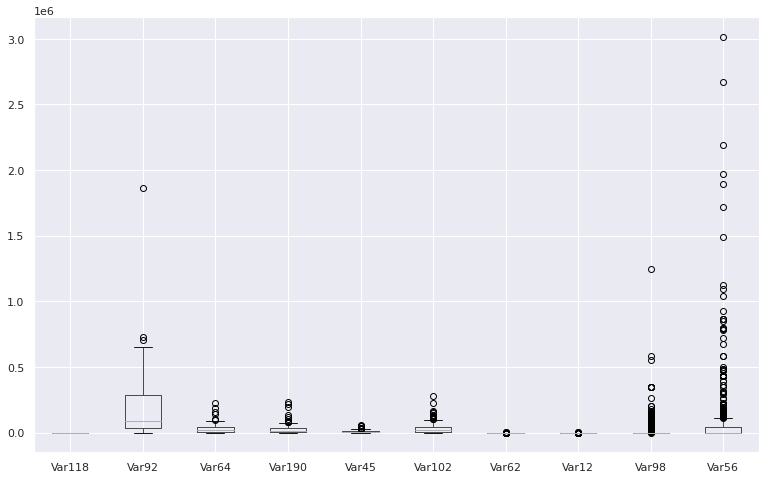

In [12]:
df_train.boxplot(column=not_nans[:10].index.to_list());

Построим boxplot'ы для 10 столбцов с минимальным количеством NaN'ов

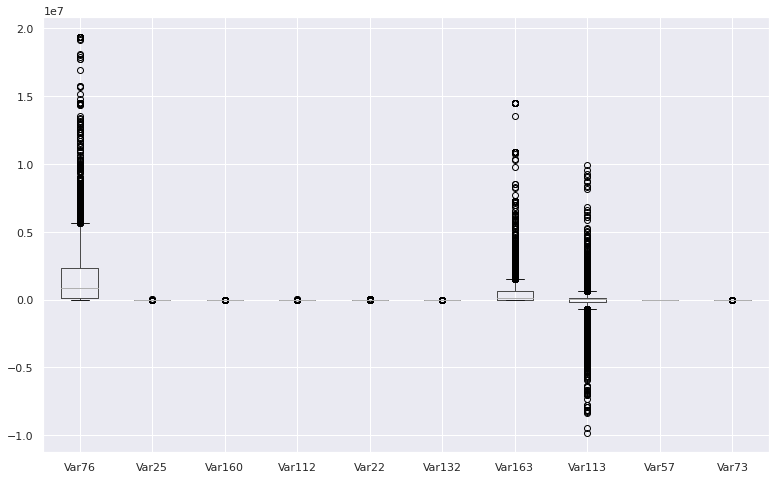

In [13]:
df_train[not_nans[-10:].index].boxplot();

Пример одного столбца с разбиением по целевой переменной

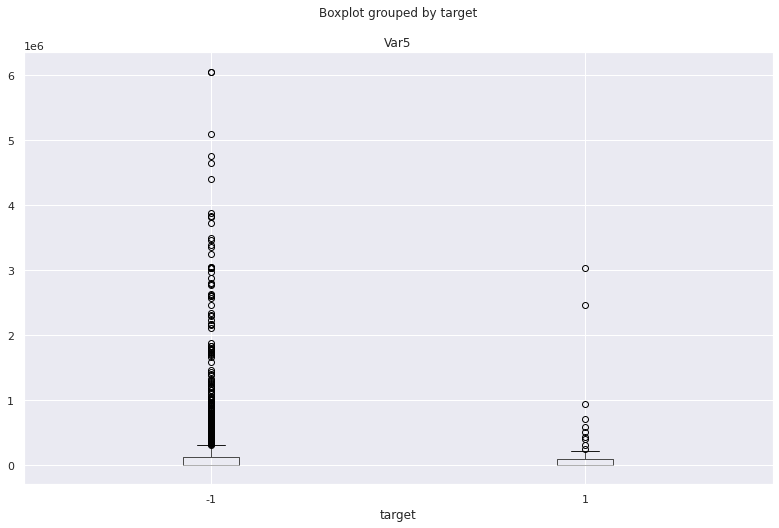

In [14]:
df_train.boxplot(column=['Var5'], by='target');

Для расчёта корреляции непрерывных признаков с бинарной целевой переменной используем следующий подход: расчитаем средние значения в каждом столбце с учётом значения целевой переменной.

Далее сравним средние значения и разность будем считать величиной корреляции.

In [15]:
medians = df_train.groupby('target').median()
medians

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190
target,,,,,,,,,,,,,,,,,,,,,
-1,0.0,0.0,0.0,0.0,0.0,861.0,7.0,20.0,0.0,8.0,...,2419200.0,0.0,101583.0,0.0,0.0,0.0,4.0,193.98,270.0,12668.94
1,8.0,0.0,0.0,0.0,0.0,791.0,7.0,34.0,0.0,8.0,...,4194547.0,0.0,390504.0,0.0,0.0,0.0,6.0,241.14,222.0,8615.25


In [16]:
means = df_train.groupby('target').mean()
means

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190
target,,,,,,,,,,,,,,,,,,,,,
-1,10.900935,0.005181,436.173237,0.147541,252273.706041,1335.855240,6.923846,47.121495,376455.246168,8.564315,...,3.804263e+06,0.609007,1.404086e+06,80083.852850,7.307772,3.543925,15.891589,162.883275,273.622350,22970.571361
1,12.571429,0.000000,268.390244,0.163636,185323.839286,1130.382022,5.217486,53.085714,478212.107143,8.195122,...,4.124426e+06,0.629975,1.342472e+06,94627.219512,10.048780,3.085714,18.571429,217.478049,233.422713,17753.648824


In [96]:
corrs = (means.loc[1] - means.loc[-1])

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [98]:
top_correlated_pos = corrs.sort_values(ascending=False)[:20]
top_correlated_pos

Var131    1.034608e+07
Var69     4.808584e+05
Var53     4.389077e+05
Var177    4.017487e+05
Var180    3.201630e+05
Var114    2.416347e+05
Var111    1.931651e+05
Var113    1.628422e+05
Var153    1.514534e+05
Var10     1.017569e+05
Var139    9.586470e+04
Var38     7.767100e+04
Var36     5.799337e+04
Var76     5.678068e+04
Var150    4.557850e+04
Var162    4.456118e+04
Var86     4.061467e+04
Var70     3.612266e+04
Var149    2.953667e+04
Var134    1.494272e+04
dtype: float64

In [99]:
top_correlated_neg = corrs.sort_values(ascending=True)[:20]
top_correlated_neg

Var154   -141731.558879
Var59    -130636.055601
Var124   -122003.961848
Var33     -98084.971292
Var5      -66949.866756
Var182    -61614.779285
Var92     -57588.459712
Var108    -45158.474766
Var171    -41570.366126
Var37     -37952.494337
Var136    -30731.860254
Var56     -22094.825620
Var80     -17711.523364
Var94      -9689.091445
Var106     -9118.277347
Var165     -8230.840216
Var95      -8222.666903
Var117     -7494.656334
Var125     -5315.396947
Var190     -5216.922538
dtype: float64

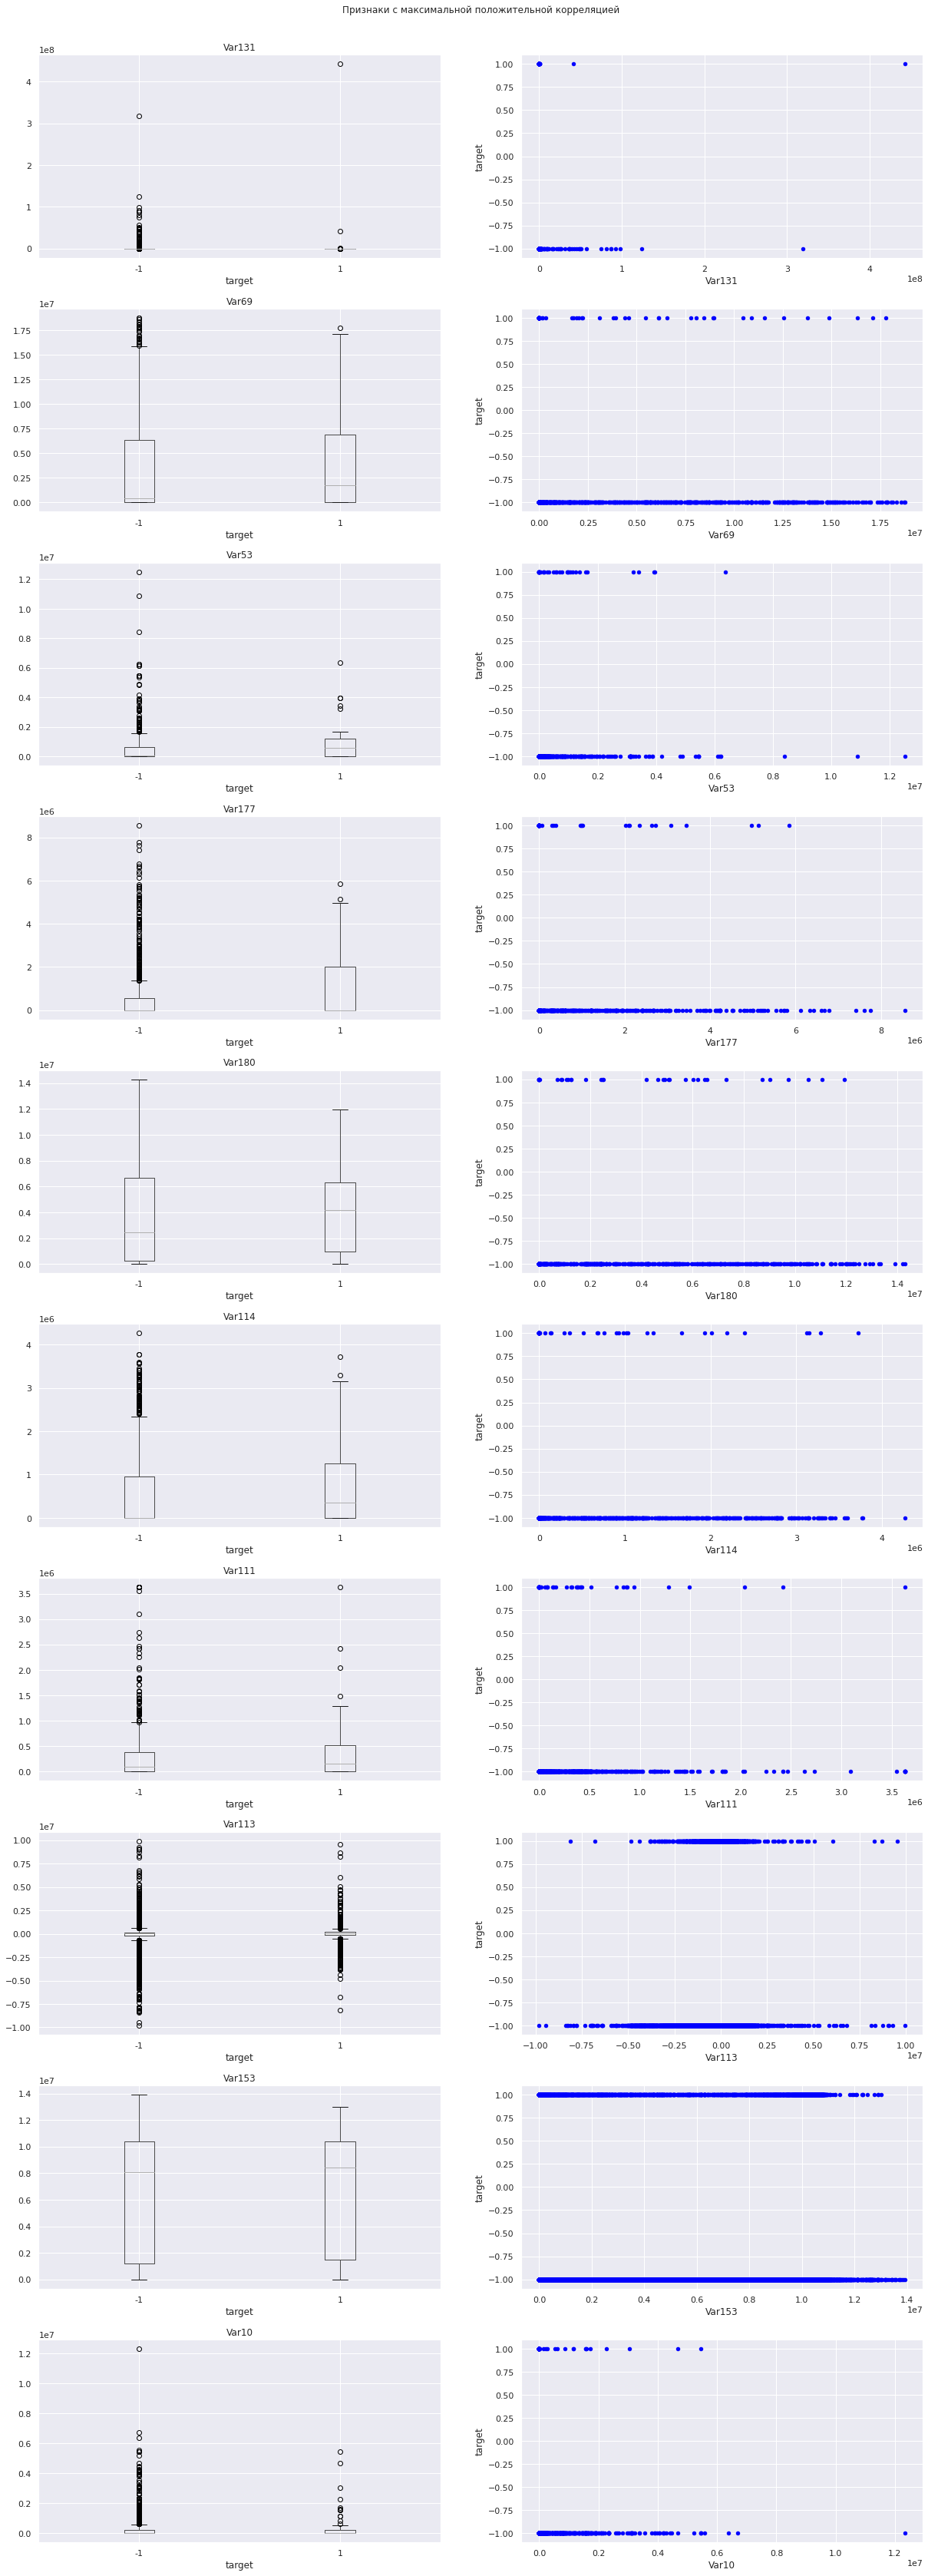

In [80]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 60))
fig.subplots_adjust(hspace=0.25)
for i, ax in enumerate(axes):
    col = top_correlated_pos.index.to_list()[i]
    df_train.boxplot(column=col, by='target', ax=ax[0])
    df_train.plot.scatter(x=col, y='target', ax=ax[1], color='blue')
fig.suptitle('Признаки с максимальной положительной корреляцией', y=0.915);

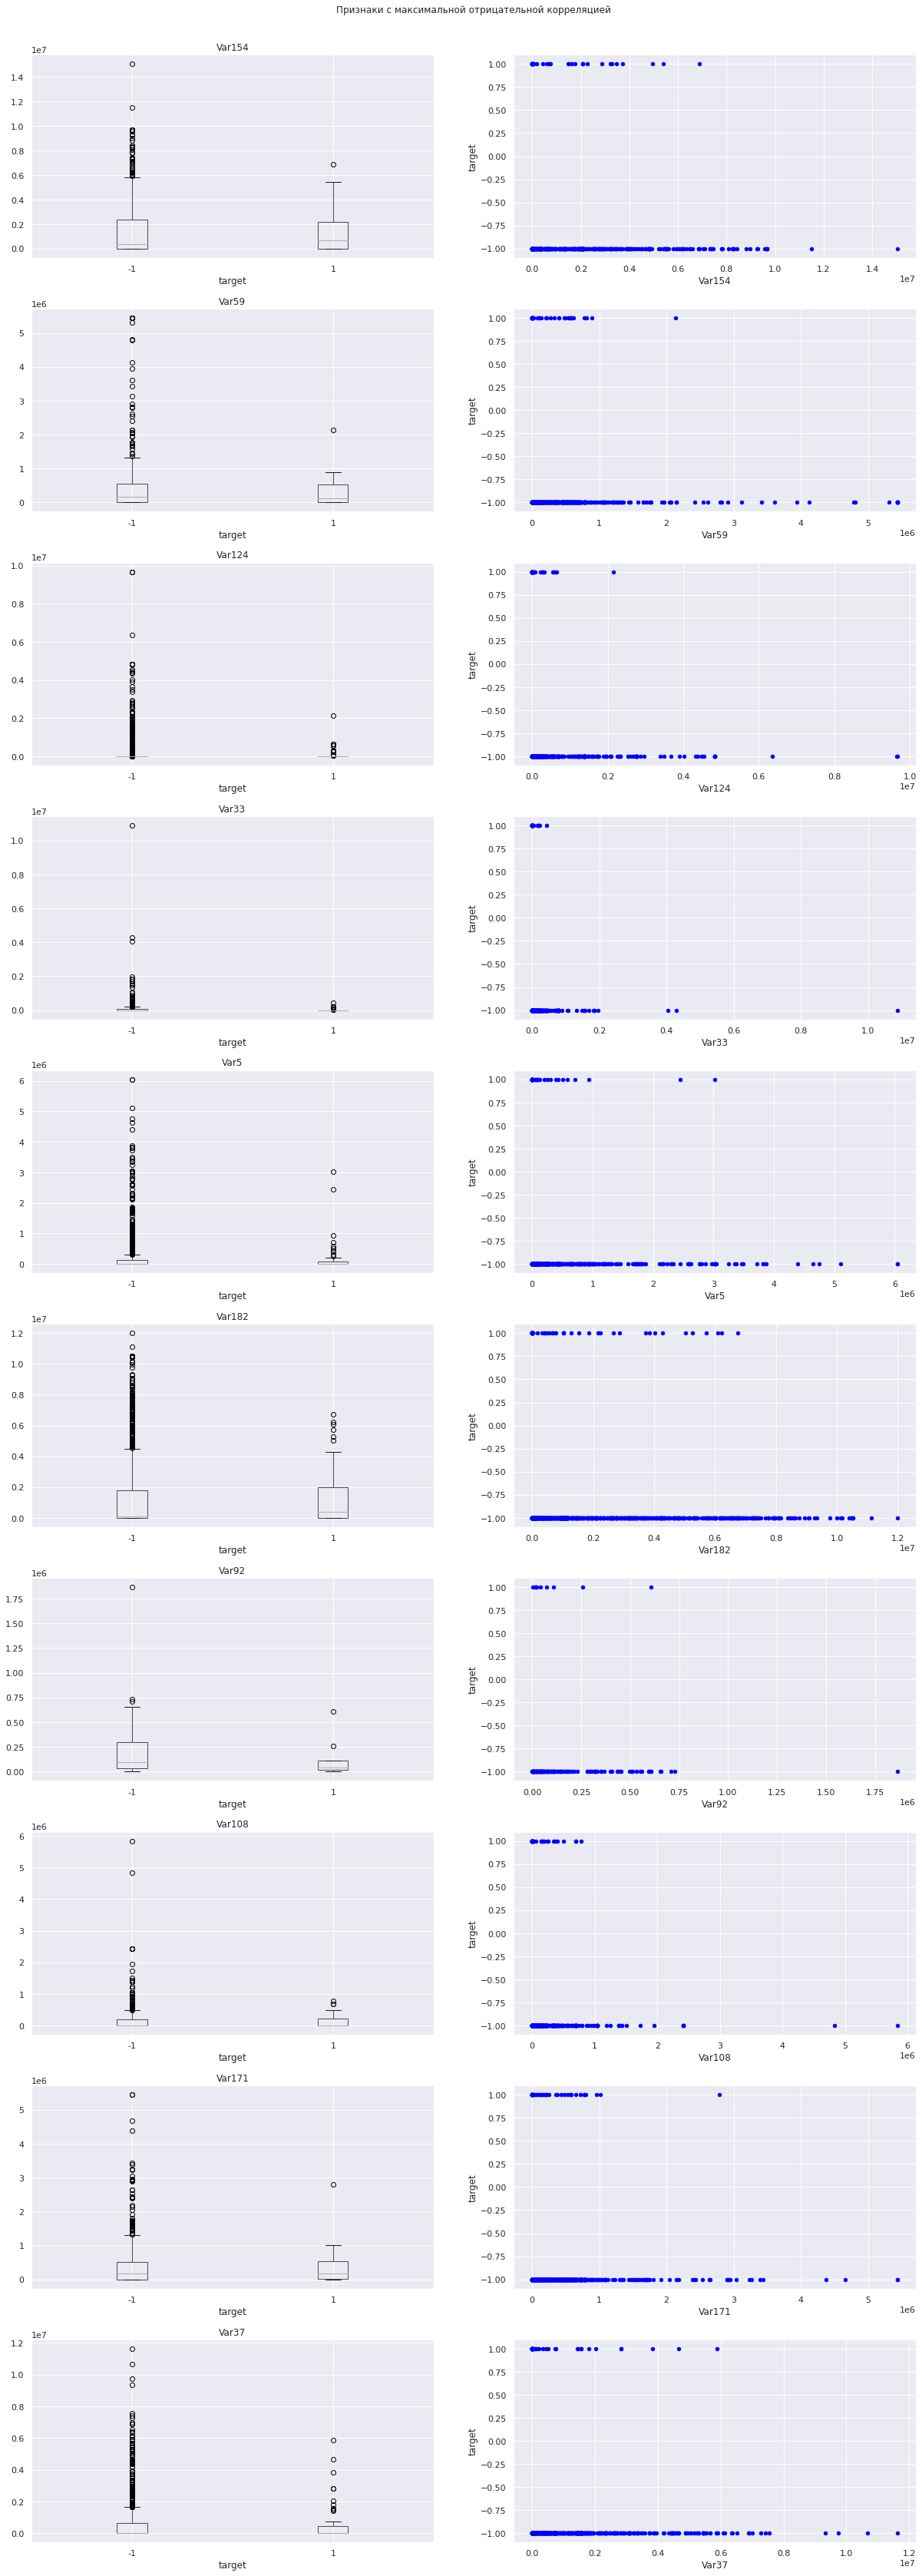

In [82]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 60))
fig.subplots_adjust(hspace=0.25)
for i, ax in enumerate(axes):
    col = top_correlated_neg.index.to_list()[i]
    df_train.boxplot(column=col, by='target', ax=ax[0])
    df_train.plot.scatter(x=col, y='target', ax=ax[1], color='blue');
fig.suptitle('Признаки с максимальной отрицательной корреляцией', y=0.915);

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [100]:
import random

random_10 = random.sample(range(means.shape[1]), 10)

random_correlated = corrs[random_10]

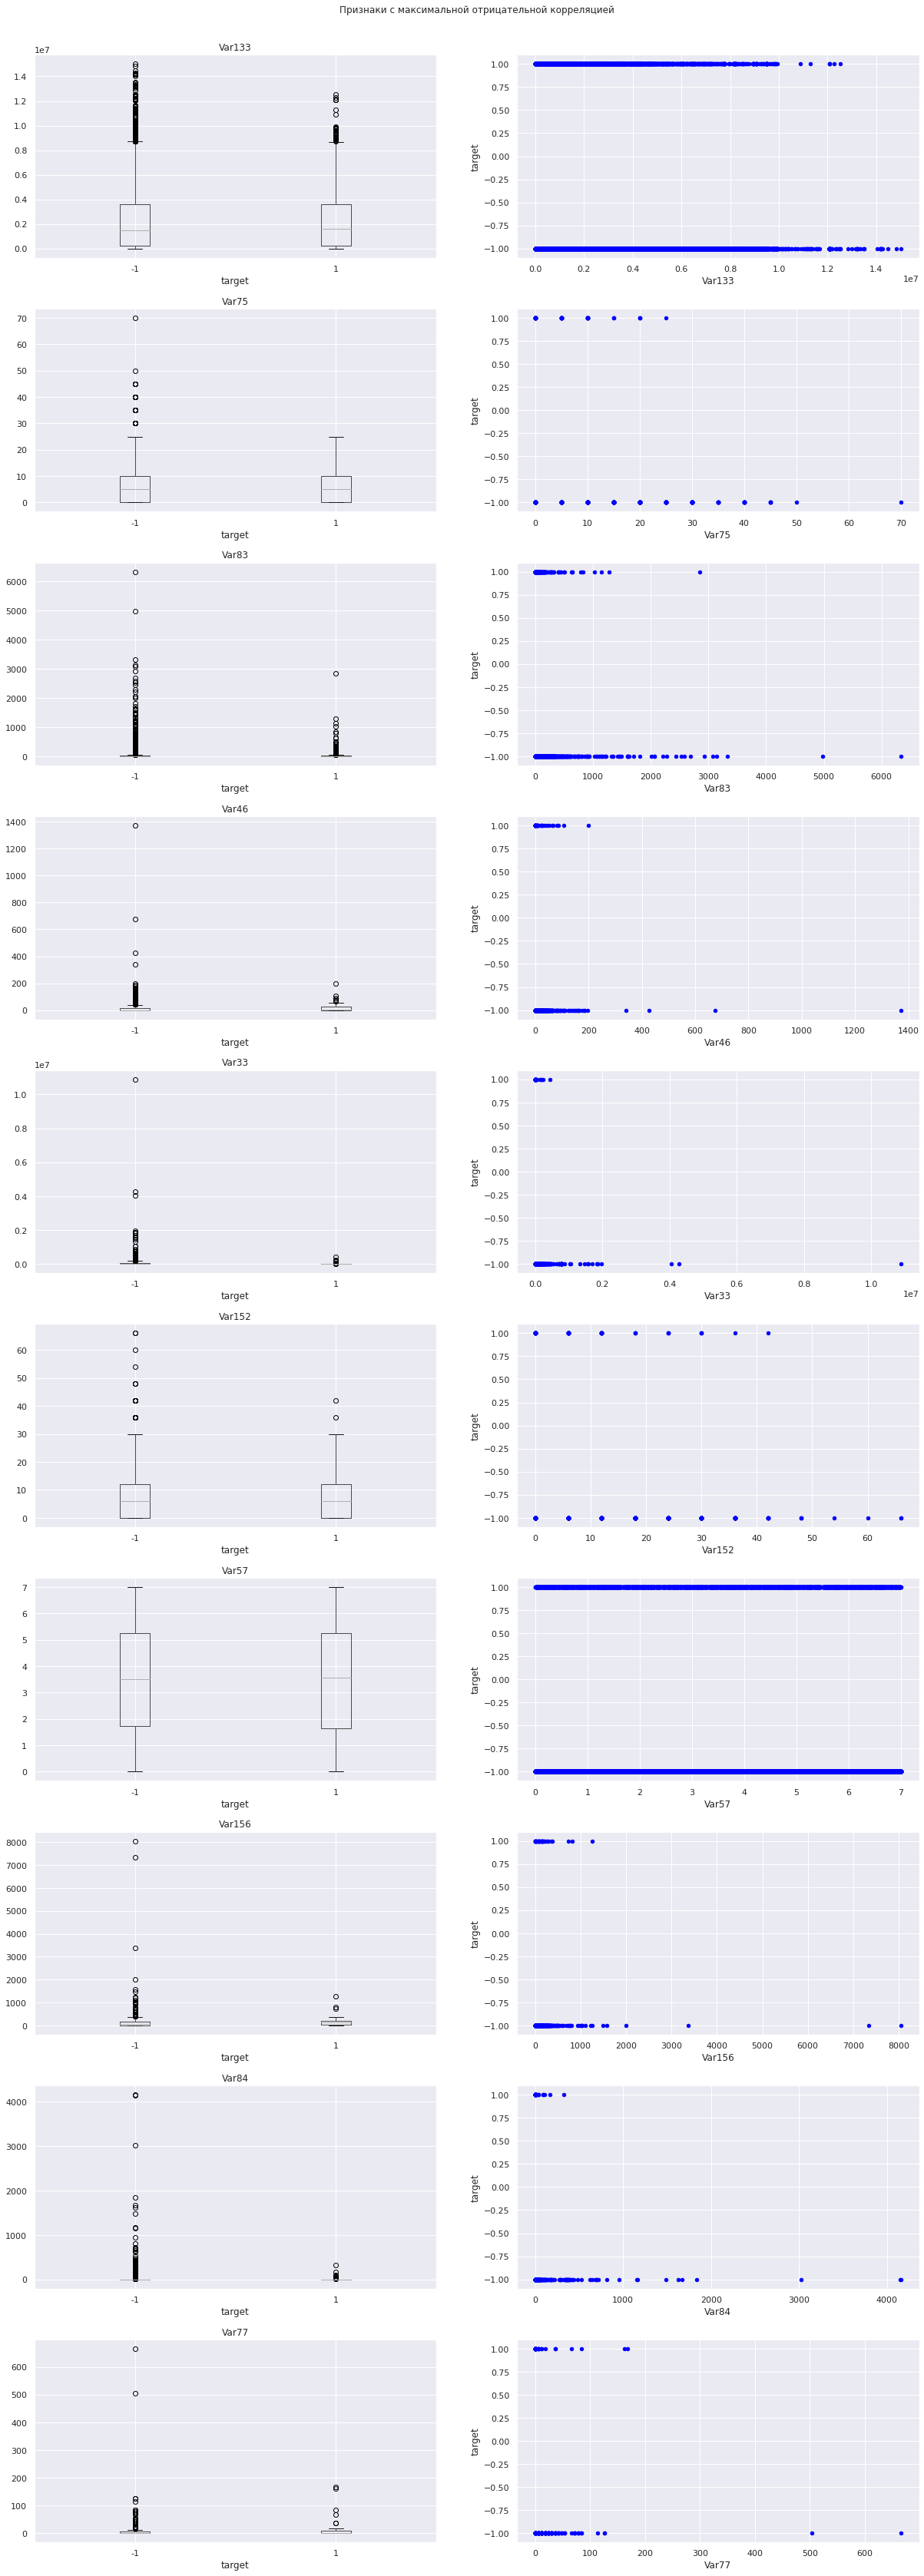

In [95]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 60))
fig.subplots_adjust(hspace=0.25)
for i, ax in enumerate(axes):
    col = random_correlated.index.to_list()[i]
    df_train.boxplot(column=col, by='target', ax=ax[0])
    df_train.plot.scatter(x=col, y='target', ax=ax[1], color='blue');
fig.suptitle('Признаки с максимальной отрицательной корреляцией', y=0.915);

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [105]:
less_correlated = corrs.abs().sort_values()[:10]
less_correlated

Var118    0.000000
Var138    0.001639
Var44     0.003251
Var173    0.005087
Var2      0.005181
Var116    0.012817
Var4      0.016095
Var26     0.016762
Var29     0.018692
Var181    0.020968
dtype: float64

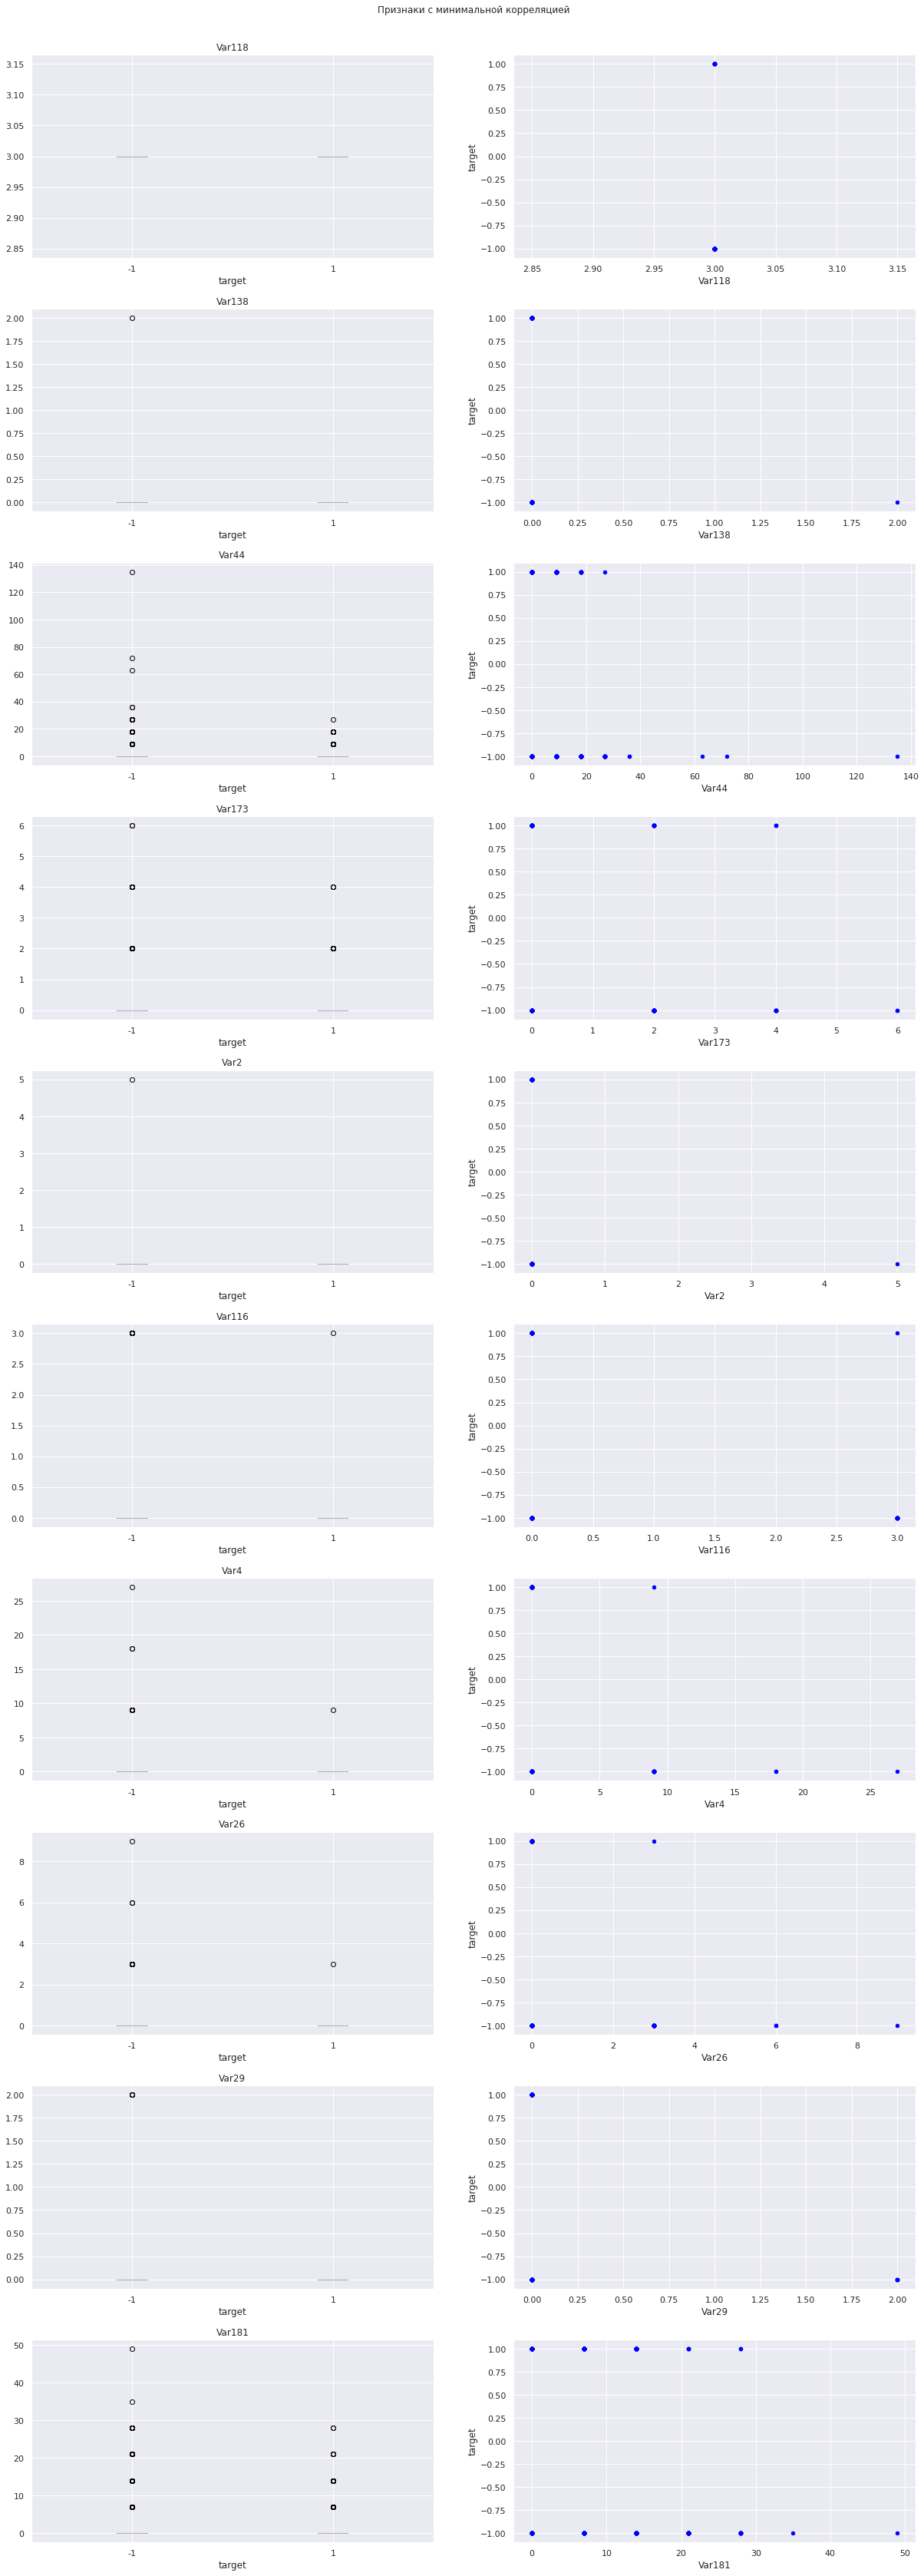

In [107]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 60))
fig.subplots_adjust(hspace=0.25)
for i, ax in enumerate(axes):
    col = less_correlated.index.to_list()[i]
    df_train.boxplot(column=col, by='target', ax=ax[0])
    df_train.plot.scatter(x=col, y='target', ax=ax[1], color='blue');
fig.suptitle('Признаки с минимальной корреляцией', y=0.915);

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [133]:
df_cat = df_train.select_dtypes(include='object')
df_cat

,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,...,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229
0,NaN,NESt0G8EIb,AERks4l,NaN,taul,1K8T,0LaQ,UaKK0yW,I1sFbv_0IT,NaN,...,hLKtJ9p,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN
1,NaN,P1WvyxLp3Z,2Knk1KF,NaN,taul,1K8T,YFAj,Bnunsla,o64y9zI,DlISMzi,...,hN8KpA1,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86
2,NaN,FoxgUHSK8h,LrdZy8QqgUfkVShG,NaN,taul,1K8T,TyGl,fhk21Ss,nQUveAzAF7,NaN,...,4UxGlow,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86
3,NaN,vNEvyxLp3Z,RO12,NaN,taul,1K8T,0Xwj,uoZk2Zj,LWyxgtXeJL,NaN,...,ylCK5YS,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN
4,NaN,4e7gUH7IEC,RO12,NaN,taul,1K8T,vSNn,kugYdIL,ZIXKpoNpqq,NaN,...,PYpzAu9,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,NaN,IXSgUHShse,RO12,SEuy,taul,1K8T,JLbT,qMlD1gf,CdPgMY1Z52,IjmTVSM,...,U8IVcJ1,oslk,8xSqDjb,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86
39996,NaN,tr0gUH7ejg,RO12,NaN,taul,1K8T,lK27,Wtcr3WP,qzIoq9b,NaN,...,5ZxD5lR,oslk,WUmqPCU,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN
39997,NaN,C2Dvyx875g,RO12,NaN,taul,1K8T,487l,FZVtMxl,LH0kFz12FM,hDyVP2J,...,B9vNioI,oslk,pHOw_BK,LM8l689qOp,NaN,ELof,WqMG,RAYp,F2FyR07IdsN7I,am7c
39998,NaN,dTGmfo8zhV,RO12,NaN,taul,1K8T,487l,gRinF0C,e1XhvTunuD,NaN,...,SCnYWu3,oslk,WC7Esaq,LM8l689qOp,NaN,NaN,wX53,RAYp,F2FyR07IdsN7I,NaN


In [128]:
df_train.select_dtypes(include='object').nunique()

Var191        1
Var192      354
Var193       50
Var194        3
Var195       23
Var196        4
Var197      220
Var198     3891
Var199     4400
Var200    13297
Var201        2
Var202     5542
Var203        5
Var204      100
Var205        3
Var206       21
Var207       14
Var208        2
Var210        6
Var211        2
Var212       78
Var213        1
Var214    13297
Var215        1
Var216     1819
Var217    12470
Var218        2
Var219       22
Var220     3891
Var221        7
Var222     3891
Var223        4
Var224        1
Var225        3
Var226       23
Var227        7
Var228       30
Var229        4
dtype: int64

In [131]:
def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [160]:
cat_corrs = pd.Series()
for col in df_cat.columns:
    corr = cramers_v(df_train[col], df_train.target)
    if not np.isnan(corr):
        cat_corrs.loc[col] = corr

In [165]:
cat_corrs.sort_values(ascending=False)[:20]

Var199    0.237375
Var192    0.116264
Var216    0.083442
Var206    0.077436
Var212    0.075150
Var205    0.073484
Var228    0.070617
Var193    0.060861
Var207    0.055418
Var227    0.054255
Var204    0.047846
Var221    0.047568
Var210    0.047235
Var218    0.044425
Var200    0.042818
Var214    0.042818
Var226    0.042471
Var197    0.034824
Var211    0.031539
Var225    0.030928
dtype: float64

In [171]:
cat_cols = cat_corrs.sort_values(ascending=False)[:20].index.to_list()

In [172]:
df_cat[cat_cols].nunique()

Var199     4400
Var192      354
Var216     1819
Var206       21
Var212       78
Var205        3
Var228       30
Var193       50
Var207       14
Var227        7
Var204      100
Var221        7
Var210        6
Var218        2
Var200    13297
Var214    13297
Var226       23
Var197      220
Var211        2
Var225        3
dtype: int64

In [181]:
df_cat['Var199']

0        I1sFbv_0IT
1           o64y9zI
2        nQUveAzAF7
3        LWyxgtXeJL
4        ZIXKpoNpqq
            ...    
39995    CdPgMY1Z52
39996       qzIoq9b
39997    LH0kFz12FM
39998    e1XhvTunuD
39999       J3fgbi2
Name: Var199, Length: 40000, dtype: object

In [185]:
sns.countplot(x='Var199', data=df_train)

<AxesSubplot:xlabel='Var199', ylabel='count'>

Error in callback <function flush_figures at 0x7fcffe3b49d0> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:>

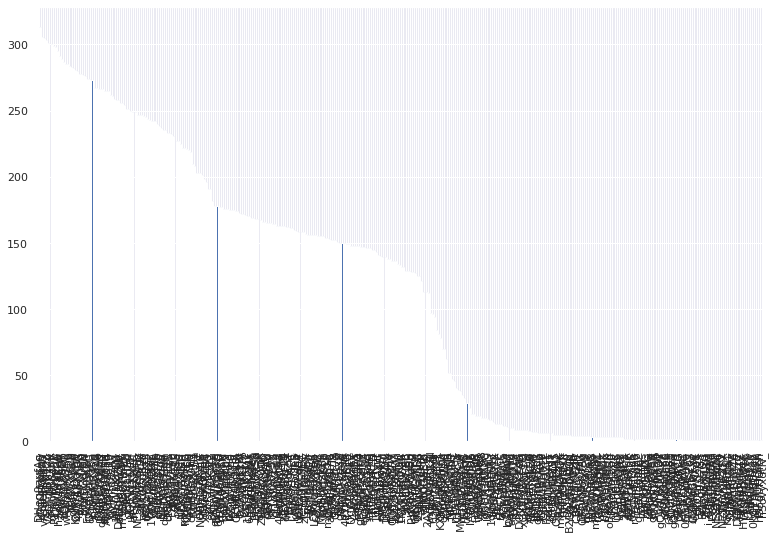

In [123]:
df_train['Var192'].value_counts().plot(kind='bar')

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?